# Rain in Australia

In [1]:
# Get Reproducible Results within the notebook
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
# I think it is much easier to import the dataset from my github repository than from kaggle itself
data = 'weatherAUS.csv'
df = pd.read_csv(data)

In [4]:
df.shape

(145460, 23)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
# Are there any missing values (NaN)?
df['RainToday'].isnull().sum()
df.dropna(subset=['RainToday'], inplace=True)

In [9]:
df = df.drop(['RainTomorrow'],axis=1)

In [10]:
# Which are the unique values?
df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5


In [12]:
#uniqe year 
df['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int64)

In [13]:
#split df[2015 2016 2017] for test
X_test = df[(df['Year'] == 2015) | (df['Year'] == 2016) | (df['Year'] == 2017)]
X_train = df[(df['Year'] != 2015) & (df['Year'] != 2016) & (df['Year'] != 2017)]


In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [15]:
Numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(Numerical)))
print('The numerical variables are :', Numerical)

There are 19 numerical variables
The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [16]:
for col in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    col_mode=X_train[col].mode()
    X_train[col].fillna(col_mode, inplace=True)  
    X_test[col].fillna(col_mode, inplace=True)

In [17]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])

In [18]:
for col in Numerical:
    col_median=X_train[col].median()
    X_train[col].fillna(col_median, inplace=True)  
    X_test[col].fillna(col_median, inplace=True)

In [19]:
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in categorical:
    X_train[var] = le.fit_transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

In [20]:
X_train.shape, X_test.shape

((98987, 24), (43212, 24))

In [21]:
correlation = X_train.corr()

<Axes: >

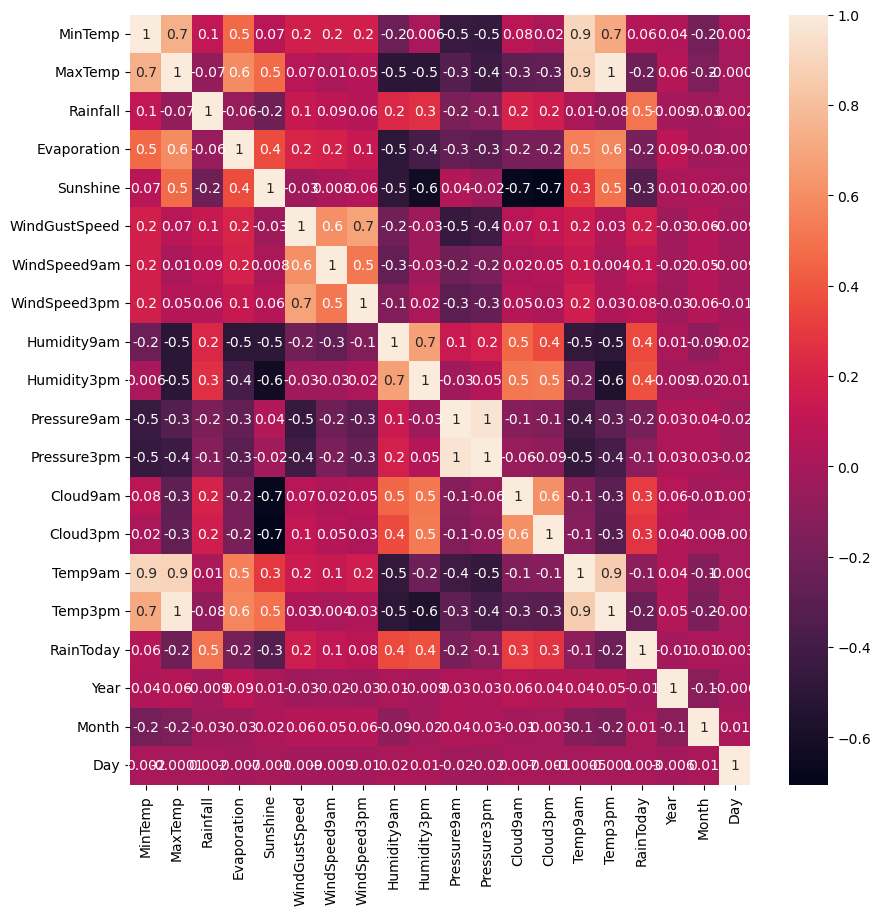

In [22]:
#matplotlib correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g')


In [23]:
y_train=X_train['RainToday']
y_test=X_test['RainToday']
X_train=X_train.drop(['RainToday'],axis=1)
X_test=X_test.drop(['RainToday'],axis=1)

In [24]:
X_train.shape, X_test.shape

((98987, 23), (43212, 23))

In [25]:
y_train.shape, y_test.shape

((98987,), (43212,))

In [26]:
X_train.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
Year               int64
Month              int64
Day                int64
dtype: object

### Feature Scaling

In [27]:
X_train.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,98987.000000,98987.000000,98987.000000,98987.00000,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000,...,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000,98987.000000
mean,23.613454,12.000098,23.006104,2.38158,5.030684,7.930725,8.326346,40.142130,7.934577,7.932021,...,51.507158,1017.514006,1015.132069,4.555740,4.630952,16.823053,21.523820,2011.432845,6.612333,15.750715
std,14.256787,6.337026,6.979827,8.51861,3.148005,2.933748,4.978786,13.208266,4.917525,4.704236,...,20.629816,6.734216,6.659874,2.319218,2.156204,6.386650,6.810699,1.802075,3.417515,8.811646
min,0.000000,-8.500000,-4.100000,0.00000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000,2007.000000,1.000000,1.000000
25%,11.000000,7.500000,17.900000,0.00000,3.800000,7.500000,4.000000,31.000000,3.000000,4.000000,...,37.000000,1013.400000,1010.900000,3.000000,3.000000,12.200000,16.600000,2010.000000,4.000000,8.000000
50%,23.000000,11.800000,22.400000,0.00000,4.600000,8.400000,9.000000,39.000000,8.000000,8.000000,...,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.500000,20.900000,2011.000000,7.000000,16.000000
75%,36.000000,16.600000,27.900000,0.80000,5.600000,9.200000,13.000000,46.000000,12.000000,12.000000,...,65.000000,1021.800000,1019.300000,6.000000,6.000000,21.300000,26.100000,2013.000000,10.000000,23.000000
max,48.000000,33.900000,48.100000,371.00000,82.400000,14.300000,16.000000,135.000000,16.000000,16.000000,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000,2014.000000,12.000000,31.000000


In [28]:
from sklearn.preprocessing import StandardScaler
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


Now all the features are scaled between 0 and 1

### Model Training

In [31]:
import numpy as np

# Assuming you have your X_train and X_test datasets available
# X_train.shape: (98987, 23)
# X_test.shape: (43212, 23)

# Define the number of time steps (sequence length) and the number of features
time_steps = 3
num_features = 23

# Reshape the data to fit into LSTM model (input shape: (samples, time_steps, num_features))

# Reshape X_train
num_samples_train = X_train.shape[0] - time_steps + 1
X_train_reshaped = np.zeros((num_samples_train, time_steps, num_features))
for i in range(num_samples_train):
    X_train_reshaped[i] = X_train[i:i+time_steps]

# Reshape X_test
num_samples_test = X_test.shape[0] - time_steps + 1
X_test_reshaped = np.zeros((num_samples_test, time_steps, num_features))
for i in range(num_samples_test):
    X_test_reshaped[i] = X_test[i:i+time_steps]

# Now 'X_train_reshaped' and 'X_test_reshaped' are 3D numpy arrays suitable for LSTM input
# They have shapes (num_samples_train, 3, 23) and (num_samples_test, 3, 23) respectively.


In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((98987, 23), (98987,), (43212, 23), (43212,))

In [33]:
# Assuming you have X_train, y_train after windowing
# X_train.shape: (num_samples_train, time_steps, num_features)
# y_train.shape: (num_samples_train,)

# Assuming you have also windowed X_test and y_test if applicable
# X_test.shape: (num_samples_test, time_steps, num_features)
# y_test.shape: (num_samples_test,)

# Ensure the last few elements that do not form a complete sequence are removed
num_samples_train = X_train_reshaped.shape[0]
num_samples_test = X_test_reshaped.shape[0]

num_complete_sequences_train = num_samples_train - time_steps + 1
num_complete_sequences_test = num_samples_test - time_steps + 1

X_train_reshaped = X_train_reshaped[:num_complete_sequences_train]
y_train = y_train[:num_complete_sequences_train]

X_test_reshaped = X_test_reshaped[:num_complete_sequences_test]
y_test = y_test[:num_complete_sequences_test]

In [34]:
X_train_reshaped.shape

(98983, 3, 23)

In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Prepare the target values (y_train and y_test) for training and testing your LSTM model

# Create the LSTM model
model = Sequential()

# Add an LSTM layer with 8 units
model.add(SimpleRNN(1, input_shape=(time_steps, num_features)))

# Add a fully connected (dense) layer to output the prediction
model.add(Dense(1, activation='linear'))  # Assuming you are predicting a continuous value

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)

# You can now use the 'predictions' variable to evaluate the performance of the model on the test set.


Epoch 1/5
3094/3094 [==============================] - 8s 2ms/step - loss: 0.1190
Epoch 2/5
3094/3094 [==============================] - 6s 2ms/step - loss: 0.0378
Epoch 3/5
3094/3094 [==============================] - 6s 2ms/step - loss: 0.0263
Epoch 4/5
3094/3094 [==============================] - 6s 2ms/step - loss: 0.0219
Epoch 5/5
1351/1351 [==============================] - 2s 2ms/step


In [36]:
y_test.shape, predictions.shape

((43208,), (43208, 1))

In [37]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions>0.5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     33614
           1       0.95      0.94      0.95      9594

    accuracy                           0.98     43208
   macro avg       0.97      0.96      0.97     43208
weighted avg       0.98      0.98      0.98     43208

